# Lista 4 - uzupełnienie

In [1]:
import numpy as np, matplotlib.pyplot as plt

In [69]:
sigma = [[1,-0.99], [0.99,1]]
mu = [0, 0]
size = 1000

In [19]:
def choleski(A):
    L00 = np.sqrt(A.item(0,0))
    L10 = A.item(1,0)/L00
    L11 = np.sqrt(A.item(1,1) - L10**2)
    return np.matrix([[L00,0],[L10,L11]])

In [21]:
def boxMuller(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    X = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    Y = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return X

In [70]:
def normND(mu, sigma, size):
    n = len(sigma)
    A = np.linalg.cholesky(sigma)
    X=[]
    for _ in range(size):
        Z = np.array(boxMuller(n)).T
        X.append(A @ Z)
    # Z = np.array(boxMuller(n))
    # A = np.linalg.cholesky(sigma)
    # X = np.array((mu+ np.dot(A,Z))).reshape(size,len(mu))
    return X

In [72]:
X_Y = normND(mu, sigma, size)

[-0.11194402 -0.40903788]


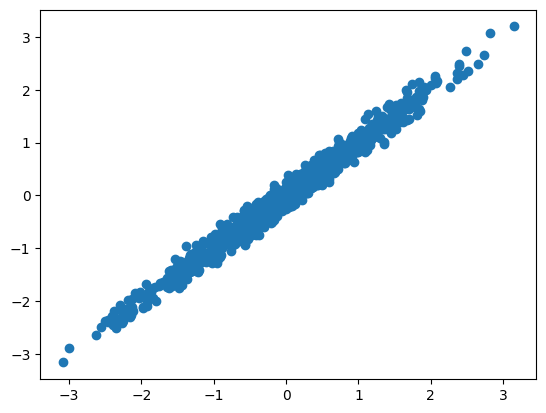

In [76]:
n = len(X_Y)
x, y = [X_Y[i][0] for i in range(n)], [X_Y[i][1] for i in range(n)]
# x = X_Y[:,0]
# y = X_Y[:,1]

plt.scatter(x,y)

In [6]:
def ecdf(X, xy):
    F = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            F[i][j] = np.sum((X[:,0]<=xy[i][j][0]) & (X[:,1]<=xy[i][j][1]))/n
    return F

In [ ]:
n = size
x = np.linspace(-5,5,n)
y = np.linspace(-5,5,n)
X, Y = np.meshgrid(x, y)
por = np.dstack((X, Y))

emp = ecdf(X_Y, por)

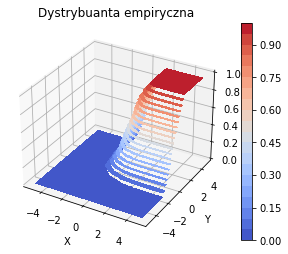

In [83]:
from scipy.stats import multivariate_normal
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.contourf(X, Y, emp, levels=20, cmap='coolwarm')
plt.title('Dystrybuanta empiryczna')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

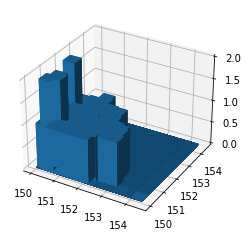

In [89]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x1, y1 = [X_Y[i][0] for i in range(n)], [X_Y[i][1] for i in range(n)]
hist, xedges, yedges = np.histogram2d(x1, y1, bins=200, range=[[0, 4], [0,4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 150, yedges[:-1] + 150, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [77]:
sigma3 = [[1,0.99,0.99],[0.99,1,0.99],[0.99,0.99,1]]
mu3 = np.zeros(3)

C:\Users\Maria Nowacka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


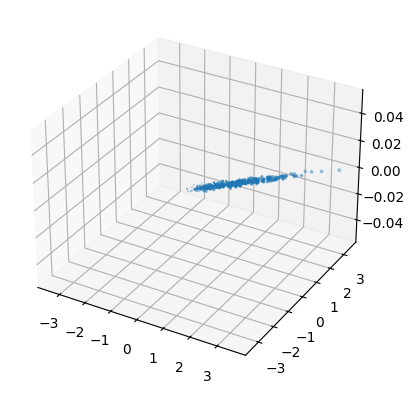

In [81]:
X3 = normND(mu3, sigma3, size)
x3, y3, z3 = [X3[i][0] for i in range(1000)], [X3[i][1] for i in range(1000)], [X3[i][2] for i in range(1000)]
# x3 = X3[:,0]
# y3 = X3[:,1]
# z3 = X3[:,2]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
plt.scatter(x3,y3,z3)